In [1]:
#Importing  libraries
import numpy as np
import pandas as pd

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
#Finding out uf there is null values
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
#Dropping the null values
df=df.dropna()

In [7]:
#Finding out if there are characters with space
df[df['review'].isin(["  "])]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [8]:
#Dropping the columns with space values
df=df[~df['review'].isin(["  "])]

In [47]:
#Defining X and y
X=df["review"]
y=df["label"]

In [48]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

neg    50.0
pos    50.0
Name: label, dtype: float64

In [12]:
# Figuring out the top 20 words (that are not english stop words) used for Positive Reviews

#Working with only the positive reviews
X_pos=df[df["label"]=="pos"].review

#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(stop_words="english")
matrix=count.fit_transform(X_pos)
freqs = zip(count.get_feature_names_out(), matrix.toarray().sum(axis=0))    
print ((sorted(freqs, key=lambda x: x[1] , reverse=True))[0:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [13]:
# Figuring out the top 20 words (that are not english stop words) used for Negative Reviews

#Working with only the positive reviews
X_neg=df[df["label"]=="neg"].review

#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(stop_words="english")
matrix=count.fit_transform(X_neg)
freqs = zip(count.get_feature_names_out(), matrix.toarray().sum(axis=0))    
print ((sorted(freqs, key=lambda x: x[1] , reverse=True))[0:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [49]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3, random_state=42)

In [59]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
#Vectorizing the words

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words="english")

tfidf.fit(X_train)

X_train_tfidf=tfidf.transform(X_train)

X_test_tfidf=tfidf.transform(X_test)

In [53]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [54]:
#Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score


In [55]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [60]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
# models.append(("SVM",SVC(gamma="auto")))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

#Evaluate each model in turn
results=[]
names=[]
scoring="accuracy"

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train_tfidf.toarray(),y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :81.86% (3.26%)
LDA :69.25% (3.15%)
Naive Bayes :63.28% (5.70%)
KNN :66.60% (3.72%)
Decision Tree :63.20% (4.72%)
Random Forest :77.28% (4.66%)
Bagging Class :69.40% (2.50%)
Extra trees :81.19% (3.48%)
Ada Boost :71.83% (5.43%)
Gradient Boosting :76.03% (3.29%)


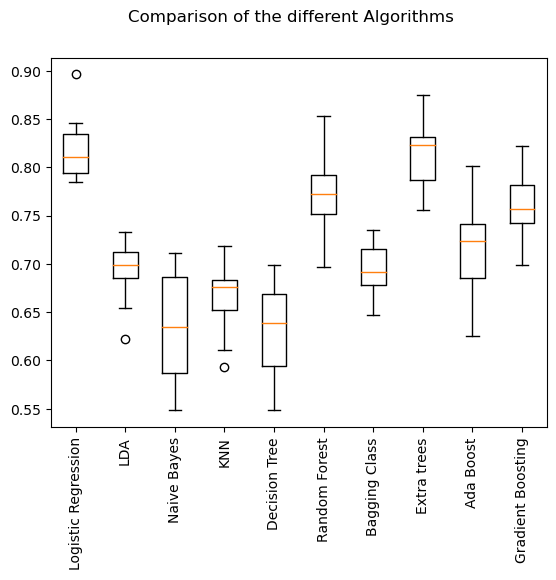

In [61]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [63]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV

import numpy as np

max_depth=np.arange(15,20)

parametros=dict(max_depth=max_depth)

model=ExtraTreesClassifier()

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train_tfidf.toarray(),(y_train.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.805302 using the params {'max_depth': 18}
0.786881 (0.016942) with {'max_depth': 15}
0.797930 (0.010110) with {'max_depth': 16}
0.798676 (0.028519) with {'max_depth': 17}
0.805302 (0.034214) with {'max_depth': 18}
0.792023 (0.017063) with {'max_depth': 19}


In [65]:
#Saving the fine_tuned model
from pickle import dump
dump(grid_result,open("best_model_sentiment.pkl","wb"))

In [69]:
#Evaluating the model using classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test_tfidf).reshape(-1,1),columns=["Label"])

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

         neg       0.77      0.82      0.79       282
         pos       0.82      0.77      0.79       300

    accuracy                           0.79       582
   macro avg       0.79      0.79      0.79       582
weighted avg       0.80      0.79      0.79       582



In [70]:
from sklearn.metrics import plot_confusion_matrix

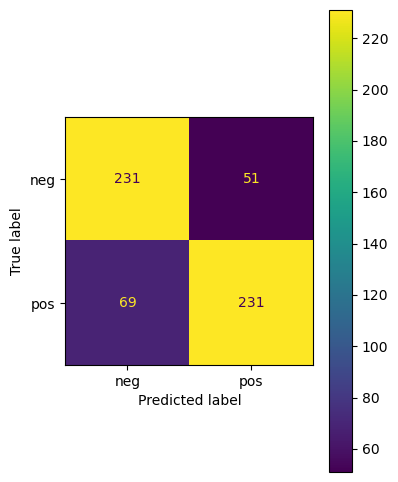

In [74]:
plot_confusion_matrix(grid_result,X_test_tfidf,y_test);

In [75]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

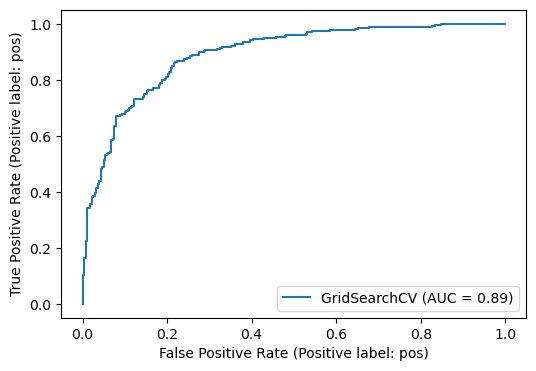

In [77]:
fig,ax=plt.subplots(figsize=(6,4));
plot_roc_curve(grid_result,X_test_tfidf,y_test,ax=ax);

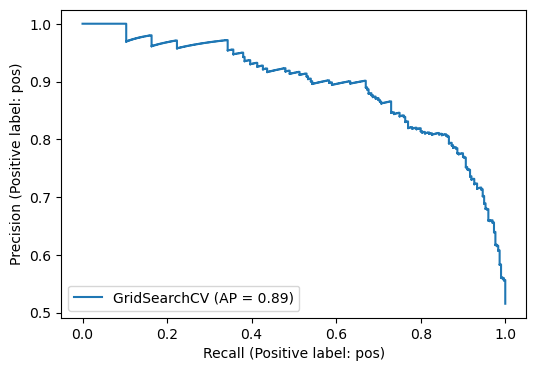

In [78]:
fig,ax=plt.subplots(figsize=(6,4));
plot_precision_recall_curve(grid_result,X_test_tfidf,y_test,ax=ax);

In [79]:
##MAKING PREDICTIONS

In [81]:
a=["great flight"]
a=tfidf.transform(a)
grid_result.predict(a)

array(['pos'], dtype=object)

In [84]:
b=["disaster"]
b=tfidf.transform(b)
grid_result.predict(b)

array(['neg'], dtype=object)

In [85]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [86]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [98]:
#Transforming the y values to integer in order to use neural networks
y=df["label"].apply(lambda x: 0 if x=="neg" else 1)

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3, random_state=42)

In [100]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train_tfidf.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train_tfidf.toarray(),y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
68/68 [==============================] - 4s 55ms/step - loss: 0.6058 - accuracy: 0.6965 - val_loss: 0.4286 - val_accuracy: 0.8235
Epoch 2/200
68/68 [==============================] - 4s 53ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.6126 - val_accuracy: 0.7721
Epoch 3/200
68/68 [==============================] - 4s 52ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4560 - val_accuracy: 0.8566
Epoch 4/200
68/68 [==============================] - 4s 52ms/step - loss: 3.0323e-04 - accuracy: 1.0000 - val_loss: 0.4747 - val_accuracy: 0.8603
Epoch 5/200
68/68 [==============================] - 3s 47ms/step - loss: 1.3107e-04 - accuracy: 1.0000 - val_loss: 0.4847 - val_accuracy: 0.8640
Epoch 6/200
68/68 [==============================] - 3s 48ms/step - loss: 7.6176e-05 - accuracy: 1.0000 - val_loss: 0.4974 - val_accuracy: 0.8640
Epoch 7/200
68/68 [==============================] - 4s 53ms/step - loss: 3.9913e-05 - accuracy: 1.0000 - val_loss: 0.5216 - val_accurac

In [101]:
#Evaluating the model
model.evaluate(X_test_tfidf,y_test)

19/19 [==============================] - 0s 6ms/step - loss: 0.7966 - accuracy: 0.8024


[0.7965863943099976, 0.8024054765701294]

In [102]:
#Saving the model
model.save("model_sentiment.h5")

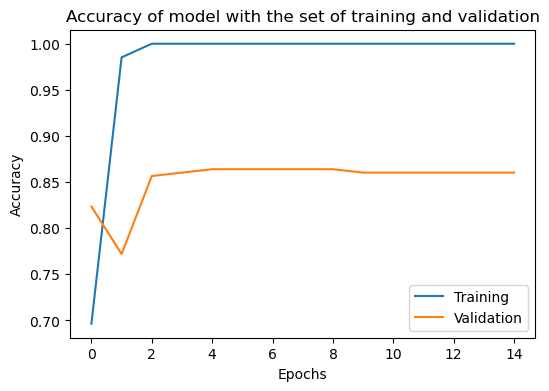

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [119]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test_tfidf.toarray()).round()

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

19/19 [==============================] - 1s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       282
           1       0.80      0.83      0.81       300

    accuracy                           0.80       582
   macro avg       0.80      0.80      0.80       582
weighted avg       0.80      0.80      0.80       582



In [143]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.round()
    return y_pred

classifier = estimator(model,[0,1])

19/19 [==============================] - 1s 30ms/step


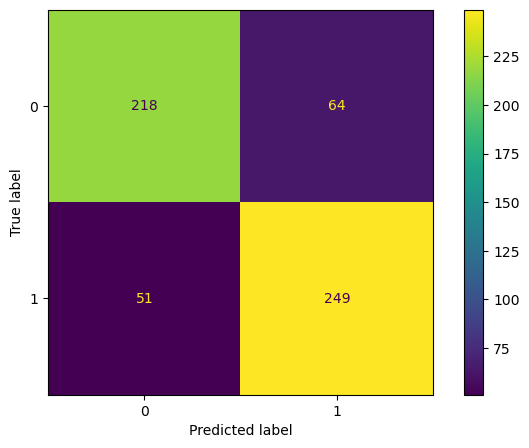

In [144]:
plot_confusion_matrix(classifier,X_test_tfidf.toarray(),y_test);
